In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [96]:
data = pd.read_csv('../raw_data/final_dataset_3.csv')

/tmp/ipykernel_3512/1384885749.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../raw_data/final_dataset_3.csv')


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447490 entries, 0 to 447489
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 447490 non-null  object 
 1   name               447490 non-null  object 
 2   popularity         447490 non-null  int64  
 3   duration_ms        447490 non-null  int64  
 4   explicit           447490 non-null  int64  
 5   artists            447490 non-null  object 
 6   release_date       447490 non-null  object 
 7   danceability       447490 non-null  float64
 8   energy             447490 non-null  float64
 9   key                447490 non-null  int64  
 10  loudness           447490 non-null  float64
 11  mode               447490 non-null  int64  
 12  speechiness        447490 non-null  float64
 13  acousticness       447490 non-null  float64
 14  instrumentalness   447490 non-null  float64
 15  liveness           447490 non-null  float64
 16  va

In [98]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,id_artists,followers,genres,artist_popularity,preview_url,cover_album
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,1922-02-22,0.645,0.44500,0,...,0.744,0.1510,0.127,104.851,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,Uli,1922-02-22,0.298,0.46000,1,...,0.856,0.4360,0.402,87.921,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,Uli,1922-02-22,0.634,0.00399,5,...,0.919,0.1050,0.396,79.895,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,Uli,1922-02-22,0.657,0.32500,10,...,0.856,0.0931,0.105,81.944,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,Uli,1922-02-22,0.644,0.68400,7,...,0.802,0.0847,0.138,100.031,45tIt06XoI0Iio4LBEVpls,91.0,NaN,4,NaN,NaN


In [99]:
data['release_date'] = pd.to_datetime(data['release_date'], format = '%Y-%m-%d') #.dt.date

In [100]:
data['release_date']

0        1922-02-22
1        1922-02-22
2        1922-02-22
3        1922-02-22
4        1922-02-22
            ...    
447485   1991-08-12
447486   2022-07-22
447487   1981-08-24
447488   1998-08-18
447489   2017-10-30
Name: release_date, Length: 447490, dtype: datetime64[ns]

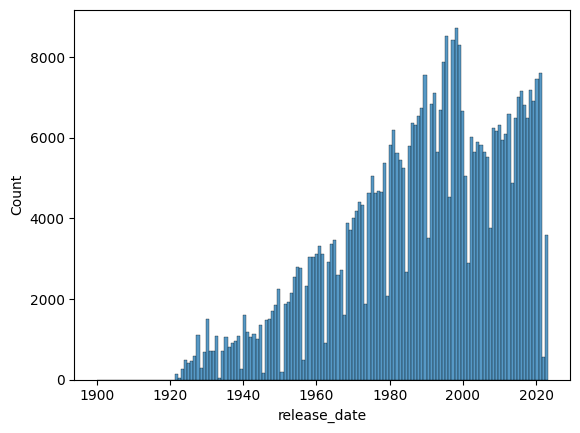

In [101]:
sns.histplot(data['release_date'])
plt.show()

In [108]:
data['delta_days'] = pd.Timestamp.today() - data['release_date']
data['delta_days'] = data['delta_days'].apply(lambda x: x.days)
data['delta_days']

0         36925
1         36925
2         36925
3         36925
4         36925
          ...  
447485    11552
447486      250
447487    15192
447488     8989
447489     1976
Name: delta_days, Length: 447490, dtype: int64

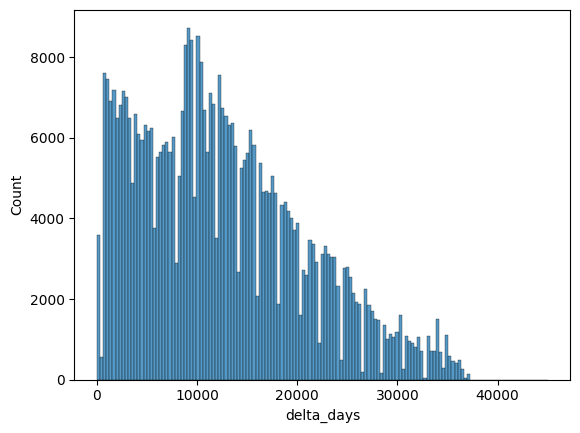

In [109]:
sns.histplot(data['delta_days'])
plt.show()

/tmp/ipykernel_3512/3042985305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loudness'][data['loudness'] > 0] = 0


<Axes: >

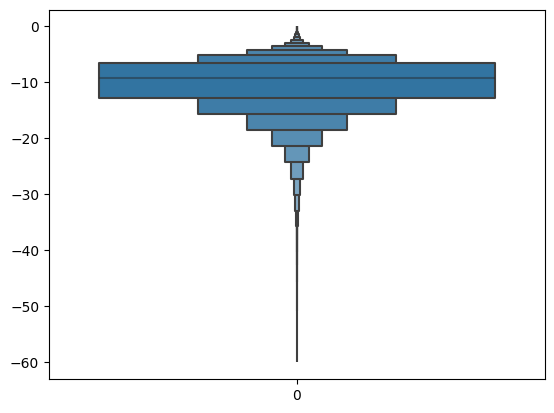

In [110]:
data['loudness'][data['loudness'] > 0] = 0
sns.boxenplot(data['loudness'])

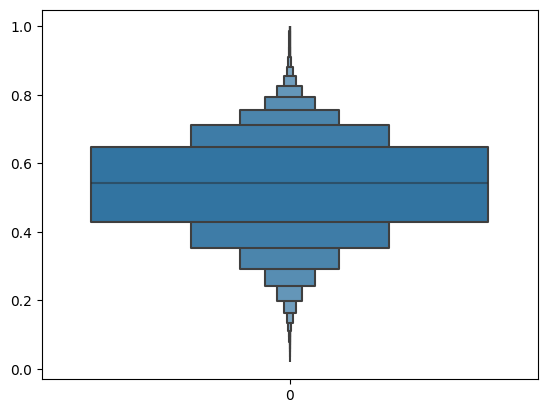

In [111]:
# Normalize the loudness to a balanced distribution
data['loudness_norm'] = np.exp(1 + data['loudness']/15)/np.e
sns.boxenplot(data['loudness_norm'])
plt.show()

/tmp/ipykernel_3512/3697978375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][data['tempo'] > 200] = 200
/tmp/ipykernel_3512/3697978375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][data['tempo'] < 50] = 50


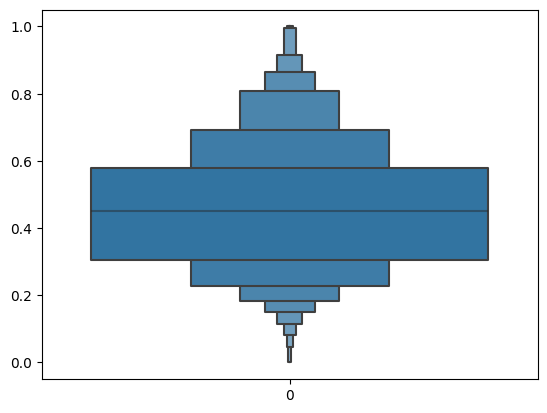

In [112]:
# normalize tempo
# 0 slowest - 1 fastest
data['tempo'][data['tempo'] > 200] = 200
data['tempo'][data['tempo'] < 50] = 50
data['tempo_norm'] = (data['tempo'] - 50)/150
sns.boxenplot(data['tempo_norm'])
plt.show()

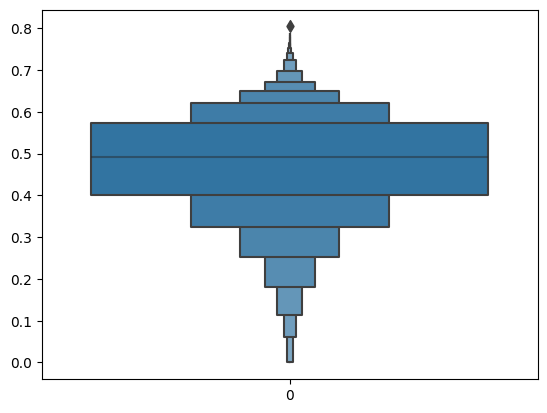

In [113]:
#normalize followers
data['followers'] = data['followers'].fillna(0)
data['followers_norm'] = np.log10(data['followers']+1)/10
sns.boxenplot(data['followers_norm'])
plt.show()

/tmp/ipykernel_3512/395983464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'][data['duration_ms']>1000000] = 1000000


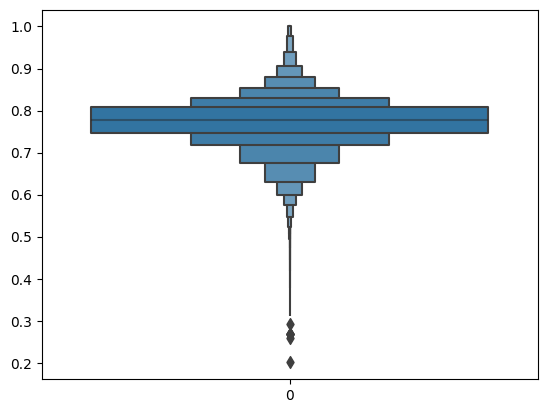

In [114]:
#normalize duration
data['duration_ms'][data['duration_ms']>1000000] = 1000000
data['duration_norm'] = np.log10(data['duration_ms']/1000000)/3+1
sns.boxenplot(data['duration_norm'])
plt.show()


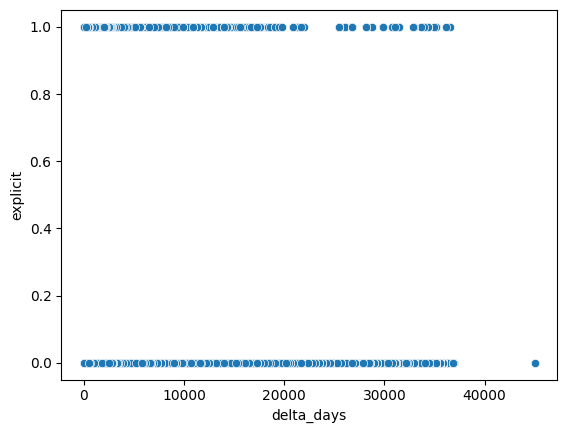

In [115]:
data['explicit'] = data['explicit'].fillna(0)
sns.scatterplot(x= data['delta_days'], y=data['explicit'])
plt.show()

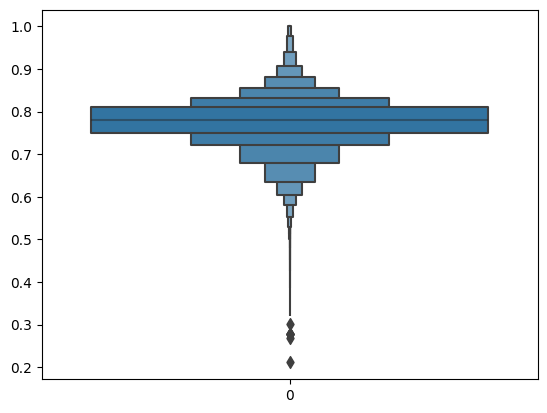

(4000, 1000000)

In [116]:
#normalize duration
data['duration_norm'] = 1+np.log(data['duration_ms']/1000000)/7
sns.boxenplot(data['duration_norm'])
plt.show()
min(data['duration_ms']), max(data['duration_ms'])

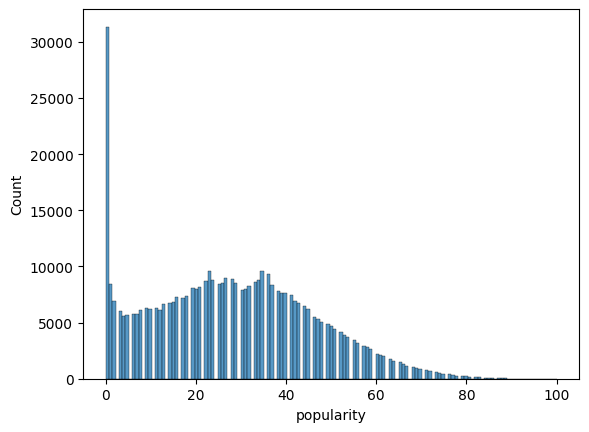

In [117]:
sns.histplot(data['popularity'])
plt.show()

In [118]:
#normalize popularity scores from 0-100 to 0-1
data['track_popularity'] = data['popularity']/100
data['artist_popularity'] = data['artist_popularity']/100

In [119]:
new_data_numeric = data.select_dtypes(exclude=['object', 'datetime64[ns]'])
new_data_numeric = new_data_numeric.drop(columns=['popularity', 'key', 
                                                  'mode', 'loudness', 'tempo', 'followers', 'duration_ms'])
new_data_numeric.dtypes

explicit               int64
danceability         float64
energy               float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
artist_popularity    float64
loudness_norm        float64
tempo_norm           float64
followers_norm       float64
duration_norm        float64
delta_days             int64
track_popularity     float64
dtype: object

In [120]:
new_data_numeric = new_data_numeric.fillna(0)
new_data_numeric.shape

(447490, 15)

In [121]:
new_data_numeric.describe()

,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,artist_popularity,loudness_norm,tempo_norm,followers_norm,duration_norm,delta_days,track_popularity
count,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000,447490.000000
mean,0.047400,0.563833,0.548235,0.103278,0.448575,0.110714,0.217693,0.556107,0.495904,0.535107,0.457810,0.475921,0.776716,12501.821849,0.278200
std,0.212493,0.166495,0.249573,0.171041,0.348425,0.263452,0.188799,0.257552,0.198039,0.152014,0.196882,0.132419,0.060152,8269.922267,0.182205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018316,0.000000,0.000000,0.211220,5.000000,0.000000
25%,0.000000,0.453000,0.357000,0.034200,0.097200,0.000000,0.098500,0.351000,0.370000,0.427985,0.305853,0.401870,0.750444,5780.000000,0.130000
50%,0.000000,0.577000,0.556000,0.044900,0.419000,0.000023,0.140000,0.570000,0.510000,0.542012,0.451460,0.491196,0.780119,11405.000000,0.270000
75%,0.000000,0.686000,0.751000,0.078500,0.782000,0.008950,0.283000,0.773000,0.640000,0.648777,0.578160,0.572819,0.809865,17707.000000,0.410000
max,1.000000,0.991000,1.000000,0.970000,0.996000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.804379,1.000000,45012.000000,1.000000


In [122]:
corr = new_data_numeric.corr()
corr['track_popularity'][np.absolute(corr['track_popularity'])>0.1].sort_values(ascending = False)

track_popularity     1.000000
artist_popularity    0.525471
followers_norm       0.464695
loudness_norm        0.342937
energy               0.301528
explicit             0.228952
danceability         0.207536
duration_norm        0.106594
instrumentalness    -0.229574
acousticness        -0.380277
delta_days          -0.609875
Name: track_popularity, dtype: float64

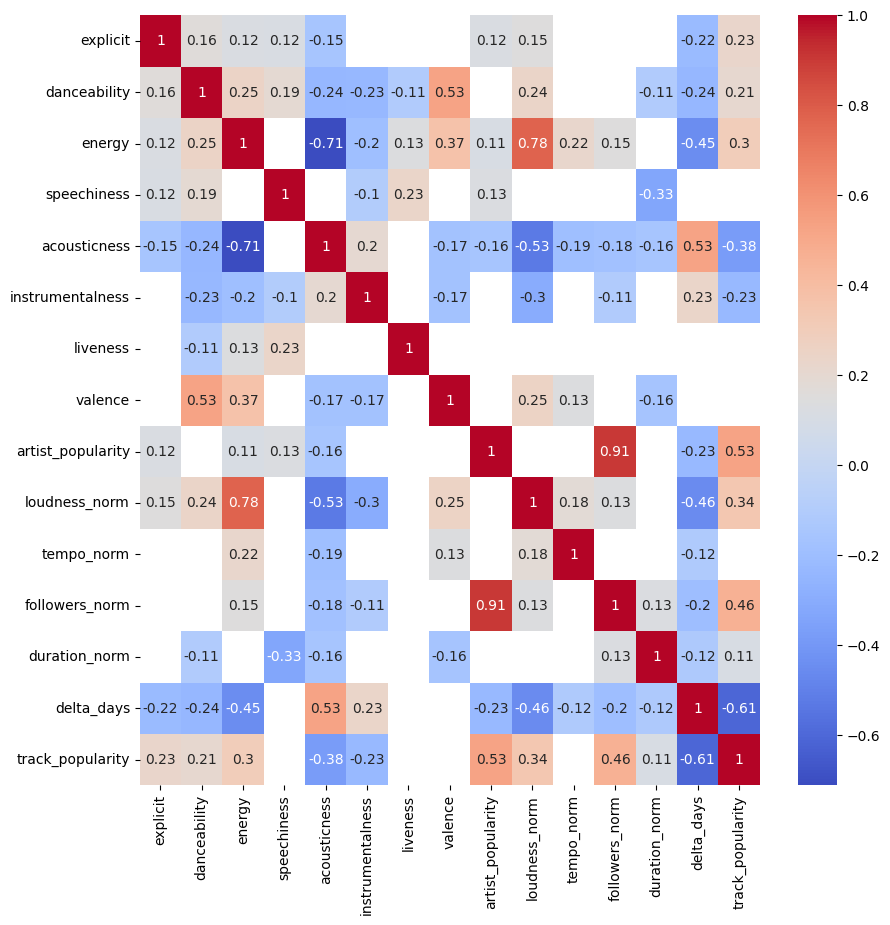

In [123]:
fig, ax = plt.subplots(figsize= (10,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import ImbalancedLearningRegression as iblr
from xgboost import XGBRegressor

In [125]:
new_data_modified = iblr.ro(
    data=new_data_numeric, 
    y='track_popularity'
)

r_index: 100%|##########| 187137/187137 [00:29<00:00, 6393.01it/s]


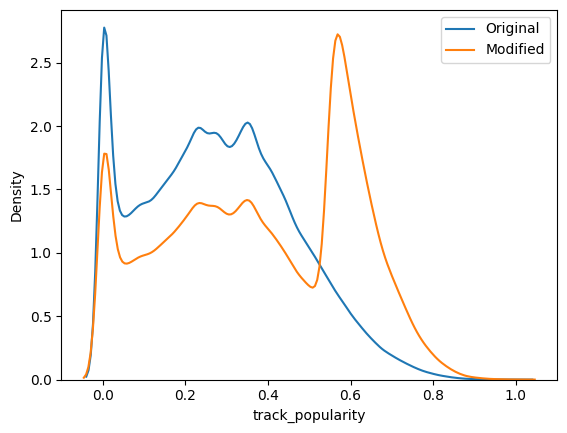

In [126]:
sns.kdeplot(new_data_numeric['track_popularity'], label = "Original")
sns.kdeplot(new_data_modified['track_popularity'], label = "Modified")
plt.legend(labels=["Original","Modified"])
plt.show()

In [131]:
new_data_numeric.shape, new_data_modified.shape

((447490, 15), (634627, 15))

In [127]:
X = new_data_modified.drop(['track_popularity'], axis = 1)
y = new_data_modified['track_popularity']

In [128]:
lin_reg = LinearRegression().fit(X, y)
lin_reg.score(X, y)

0.654292253358626

In [134]:
xgb_reg = XGBRegressor()
parameters = {
    'random_state': [0],
    'reg_alpha': [0],
    'reg_lambda': [1],
    'gamma': [0], #default: 0
    'n_estimators': [500],
    'learning_rate': [0.05], #default: 0.3
    'colsample_bytree': [0.6], #default: 1
    'subsample': [1], #default: 1
    'max_depth': [15], #default: 6
    'min_child_weight': [1], #default: 1
    'eval_metric': ['rmsle']
    }

### optional to enable CUDA accelerated training
#import torch
#if torch.cuda.device_count() > 0:
#   parameters['tree_method'] = ['gpu_hist']
#   print('CUDA-GPU accelerated tra

In [135]:
clf = GridSearchCV(xgb_reg, parameters, n_jobs=-1)
clf.fit(X, y)
clf.best_params_, clf.best_score_

({'colsample_bytree': 0.6,
  'eval_metric': 'rmsle',
  'gamma': 0,
  'learning_rate': 0.05,
  'max_depth': 15,
  'min_child_weight': 1,
  'n_estimators': 500,
  'random_state': 0,
  'reg_alpha': 0,
  'reg_lambda': 1,
  'subsample': 1},
 -3.5449847008636324)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [137]:
# initialize new XGBRegressor with best parameters from grid search on small dataset
xgb_reg = clf.best_estimator_

# fit on the full dataset
xgb_reg = xgb_reg.fit(X_train, y_train, verbose=False)

# Predict against the test set
xgb_pred = xgb_reg.predict(X_test)
    
# Score    
rmse_xgb = mean_squared_error(y_test, xgb_pred, squared=False)
print("Root Mean Squared Error for XGBoost Regressor:", round(rmse_xgb, 3))
r2_xgb = r2_score(y_test, xgb_pred)
print("R2 Score for XGBoost Regressor:", round(r2_xgb, 3))

Root Mean Squared Error for XGBoost Regressor: 0.075
R2 Score for XGBoost Regressor: 0.887


In [138]:
#Save the model
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_reg, open(file_name, "wb"))